### Name: Prakash Solanki 
#### July21 Batch

#### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
<ul>
    <li>As a business manager, try to find out the weak areas where you can
work to make more profit.</li>
    <li>What all business problems you can derive by exploring the data?</li>

#### Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading data from local space

In [4]:
store_df = pd.read_csv("SampleSuperstore.csv")
store_df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [5]:
#Finding the (rows,columns)of dataset
store_df.shape

(9994, 13)

In [6]:
#SUnderstanding DataTypes of column value
store_df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
#Finding null values
store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

As we can see above data has no null values


In [8]:
#Now let's find unique values for each column
for i in store_df.columns:
    print(i,store_df[i].nunique())

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


#### As we know that superstore data is based on only UniteStates. so we can drop unwanted columns for better analysis of data

In [9]:
store_df.drop(['Country', 'Postal Code'], axis = 1, inplace=True)

###### Now we will explore unique values in Categorical columns in which we are interested.

In [10]:
store_df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [11]:
store_df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [12]:
store_df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [13]:
store_df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

### Dealing With Outliers

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


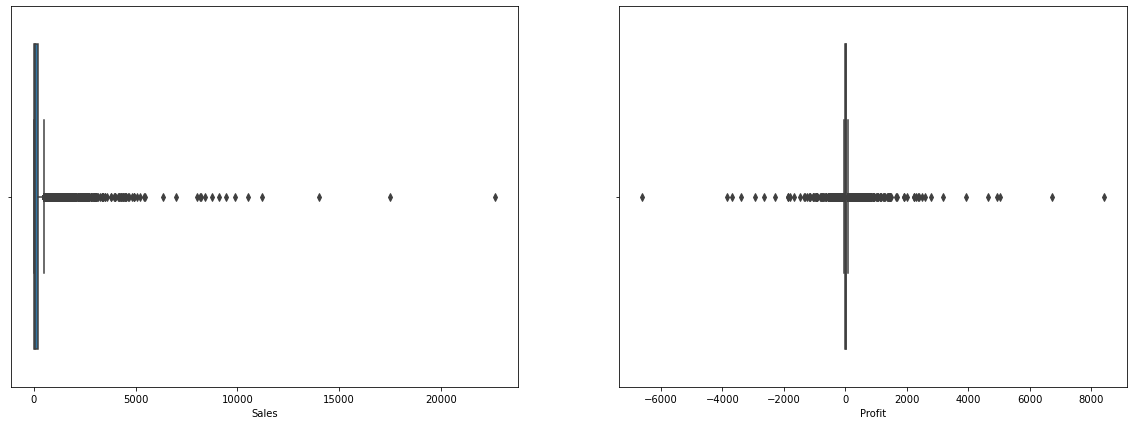

In [14]:
plt.subplot(1,2,1)
sns.boxplot(store_df['Sales'])

plt.subplot(1,2,2)
sns.boxplot(store_df['Profit'])

plt.gcf().set_size_inches(20,7)


In [15]:
sales_mean, sales_std = store_df['Sales'].mean(), store_df['Sales'].std()
#identify outliers
cut_off = sales_std * 3
lower, upper = sales_mean - cut_off, sales_mean + cut_off
outliers = [x for x in store_df['Sales'] if x < lower or x > upper]
print("Outliers in Sales: %d" %len(outliers))

Outliers in Sales: 127


In [16]:
profit_mean, profit_std = store_df['Profit'].mean(), store_df['Profit'].std()
#identify outliers
cut_off = profit_std * 3
lower, upper = profit_mean - cut_off, profit_mean + cut_off
outliers = [x for x in store_df['Profit'] if x < lower or x > upper]
print("Outliers in Profit: %d" %len(outliers))

Outliers in Profit: 107


#### Now check outliers present in Quantity and discount column

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


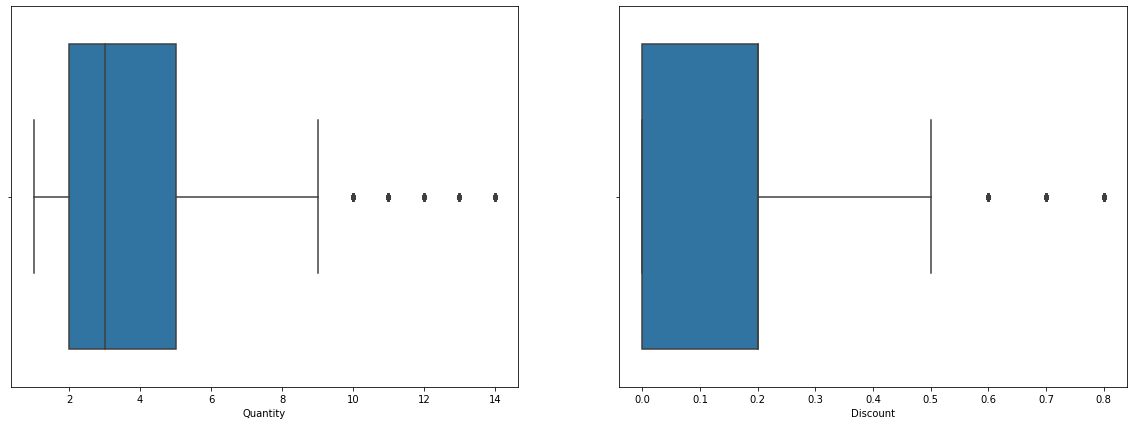

In [17]:
plt.subplot(1,2,1)
sns.boxplot(store_df['Quantity'])

plt.subplot(1,2,2)
sns.boxplot(store_df['Discount'])

plt.gcf().set_size_inches(20,7)

In [18]:
discount_mean, discount_std = store_df['Discount'].mean(), store_df['Discount'].std()
# identify outliers
cut_off = discount_std * 3
lower, upper = discount_mean - cut_off, discount_mean + cut_off
# identify outliers
outliers = [x for x in store_df['Discount'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 300


In [19]:
Quantity_mean, Quantity_std = store_df['Quantity'].mean(), store_df['Quantity'].std()
# identify outliers
cut_off = Quantity_std * 3
lower, upper = Quantity_mean - cut_off, Quantity_mean + cut_off
# identify outliers
outliers = [x for x in store_df['Quantity'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 113


#### Identified Outliers in following Attributes:
<ul>
    <li>Sales: 127</li>
    <li>Profit: 107</li>
    <li>Discount: 300</li>
    <li>Quantity: 113</li>
    </ul>

### Handling Outliers

In [20]:
for i in ['Sales']:
    q3,q1 = np.percentile(store_df.loc[: ,i],[75,25])
    iqr = q3 - q1
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    #Replacing Outliers with nan values
    store_df.loc[store_df[i]< min, i] = np.nan
    store_df.loc[store_df[i]> max, i] = np.nan

<AxesSubplot:xlabel='Sales'>

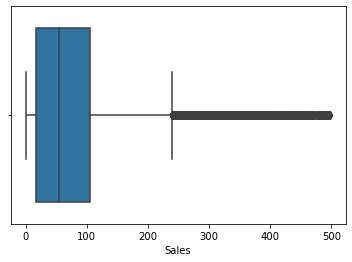

In [21]:
#Handling nan values
store_df['Sales'].fillna(store_df['Sales'].mean(), inplace=True)
#Ceating boxplot
sns.boxplot(x = store_df['Sales'])

We can see that there is no outliers in above figure

In [22]:
for i in ['Profit']:
    q3,q1 = np.percentile(store_df.loc[: ,i],[75,25])
    iqr = q3-q1
    
    max = q3 + (1.5*iqr)
    min = q1 - (1.5*iqr)
    
    #replacing outliers with nan values
    
    store_df.loc[store_df[i] < min, i] = np.nan
    store_df.loc[store_df[i] > max, i] = np.nan
    

In [23]:
store_df['Profit'].fillna(store_df['Profit'].mean(), inplace=True)

<AxesSubplot:xlabel='Profit'>

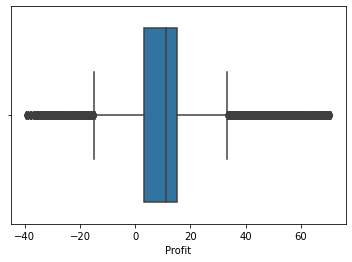

In [24]:
sns.boxplot(x = store_df['Profit'])

In [25]:
for i in ['Discount']:
    q3, q1 = np.percentile(store_df.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    store_df.loc[store_df[i] < min, i] = np.nan
    store_df.loc[store_df[i] > max, i] = np.nan

<AxesSubplot:xlabel='Discount'>

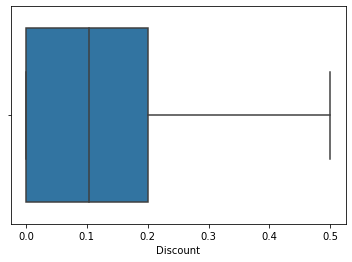

In [26]:
store_df['Discount'].fillna(store_df['Discount'].mean(), inplace=True)
sns.boxplot(x = store_df['Discount'])

In [27]:
for i in ['Quantity']:
    q3, q1 =np.percentile(store_df.loc[: , i], [75, 25])
    iqr = q3 - q1
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #replacing outliers with nan values
    store_df.loc[store_df[i] < min, i] = np.nan
    store_df.loc[store_df[i] > max, i] = np.nan

<AxesSubplot:xlabel='Quantity'>

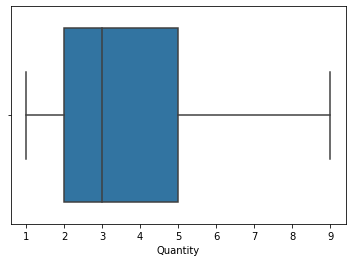

In [28]:
store_df['Quantity'].fillna(store_df['Quantity'].mean(), inplace=True)
sns.boxplot(x=store_df['Quantity'])

We have succesfully Removed the Outliers

### Univariate Analysis

In [29]:
store_df['Ship Mode'].value_counts()/store_df.shape[0]*100

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

<AxesSubplot:xlabel='Ship Mode', ylabel='Count'>

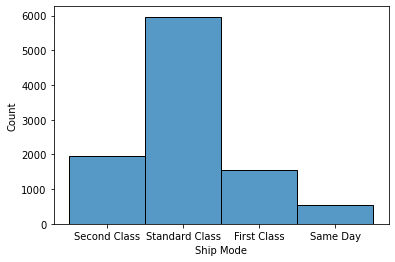

In [30]:
sns.histplot(store_df['Ship Mode'])

##### From above garoh we conclude that, 'Standard Shipping' is preferred and 'Same day' is least preferred

In [31]:
store_df['Segment'].value_counts()/store_df.shape[0]*100

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

<AxesSubplot:xlabel='Segment', ylabel='Count'>

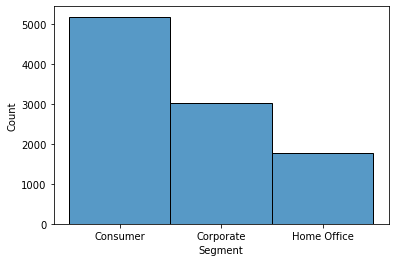

In [32]:
sns.histplot(store_df['Segment'])

#### 50% people belongs to Consumer class whereas 20-30% people belongs to Home Office and Corporate

In [33]:
store_df['Category'].value_counts()/store_df.shape[0]*100

Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: Category, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='Count'>

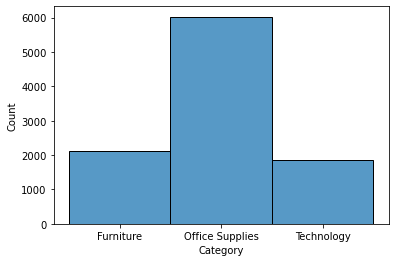

In [34]:
sns.histplot(store_df['Category'])

#### Conclusion: 60% of Category belong to Office Supplies while Furniture and Technology has share of 20-20%

In [35]:
store_df['Sub-Category'].value_counts()/store_df.shape[0]*100

Binders        15.239143
Paper          13.708225
Furnishings     9.575745
Phones          8.895337
Storage         8.465079
Art             7.964779
Accessories     7.754653
Chairs          6.173704
Appliances      4.662798
Labels          3.642185
Tables          3.191915
Envelopes       2.541525
Bookcases       2.281369
Fasteners       2.171303
Supplies        1.901141
Machines        1.150690
Copiers         0.680408
Name: Sub-Category, dtype: float64

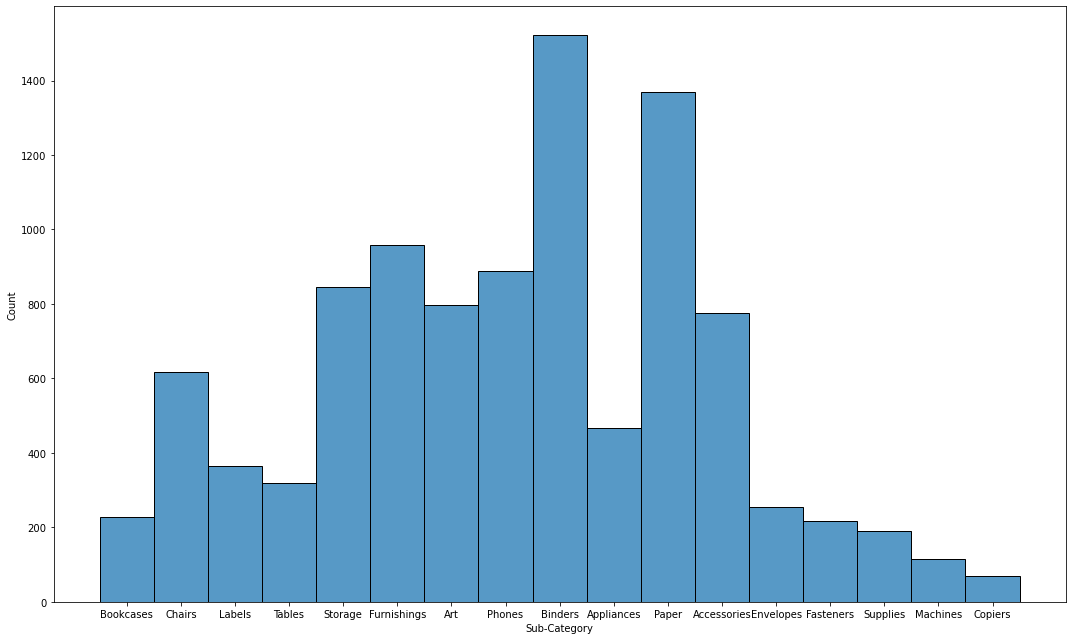

In [36]:
sns.histplot(store_df['Sub-Category'])
plt.gcf().set_size_inches(15,9)
plt.tight_layout()

#### Conclusion: Binders has highest of 15% followed by Paper 13% and  Furnishings with 9% from Sub-Category

### Bivariate Analysis

<AxesSubplot:xlabel='Category', ylabel='Sales'>

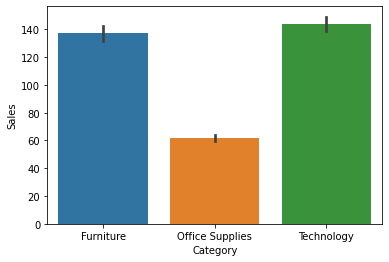

In [37]:
sns.barplot(x=store_df['Category'], y=store_df['Sales'])

#### From this graph we can conclude that Technology has the highest Sales among Category

<AxesSubplot:xlabel='Category', ylabel='Profit'>

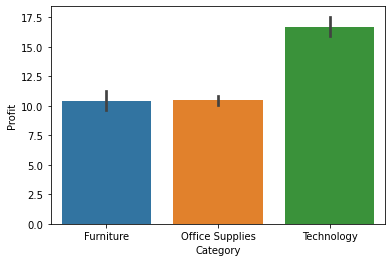

In [38]:
sns.barplot(x=store_df['Category'], y=store_df['Profit'])

#### From this garph we can understand that Highest Number of Profit was made by Technology with follow up by Furniture

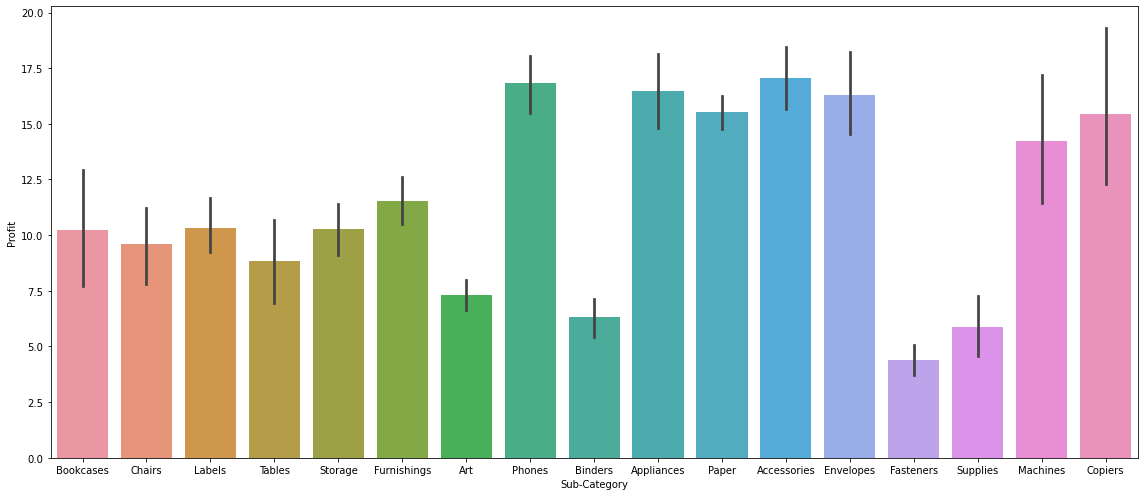

In [39]:
sns.barplot(x=store_df['Sub-Category'], y=store_df['Profit'])
plt.gcf().set_size_inches(16,7)
plt.tight_layout()

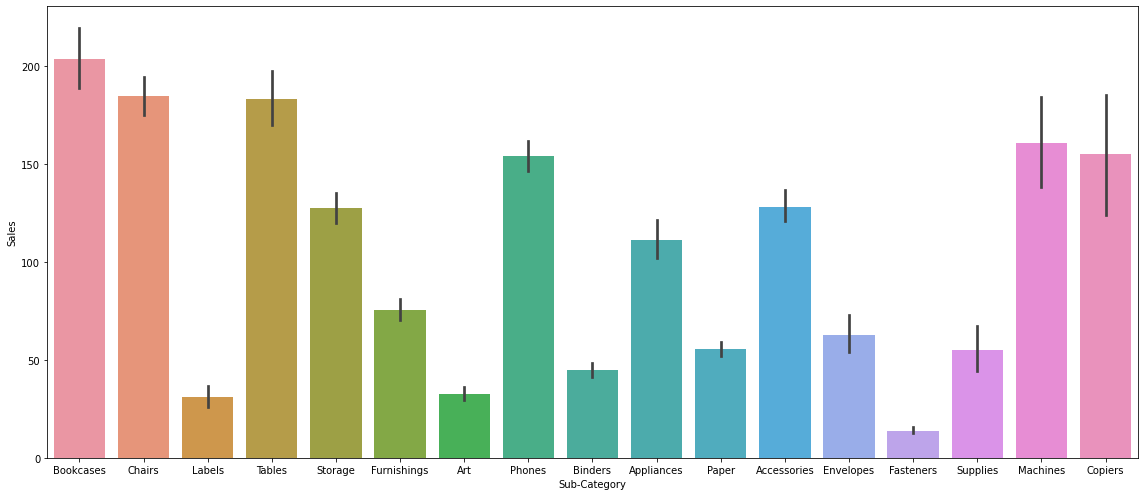

In [40]:
sns.barplot(x=store_df['Sub-Category'], y=store_df['Sales'])
plt.gcf().set_size_inches(16,7)
plt.tight_layout()

#### Here We can see that paper and labels having less sale as compare to others but has a high profit.

<AxesSubplot:xlabel='Region', ylabel='count'>

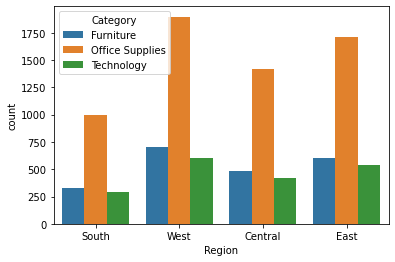

In [41]:
sns.countplot(x=store_df['Region'], hue = store_df['Category'])

##### From this graph we can conclude that:
<ul>
    <li>West Region has highest Products </li>
    <li>South Region has the lowest Products</li>

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


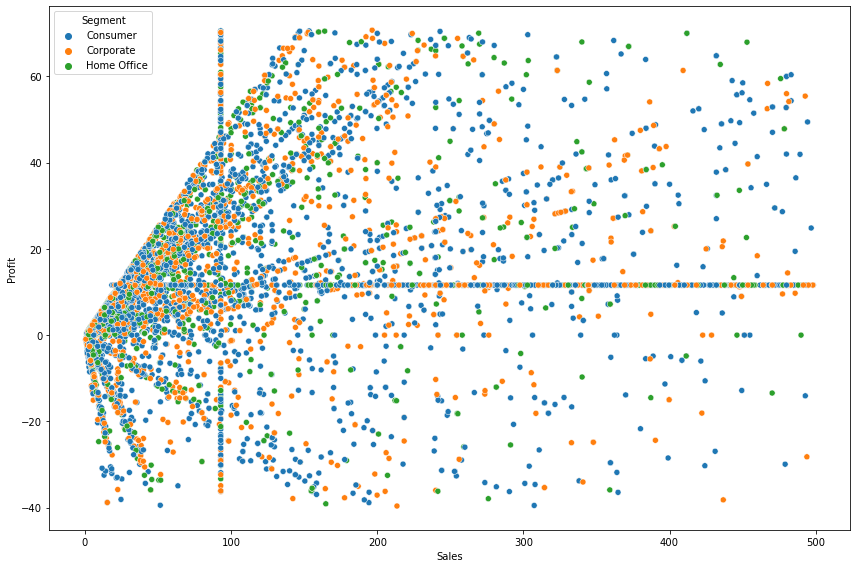

In [42]:
sns.scatterplot(store_df['Sales'], store_df['Profit'], hue = store_df['Segment'])
plt.gcf().set_size_inches(12,8)
plt.tight_layout()

<ul>
    <li> More Profit in Consumer Segment</li>
    <li> Less profit in Home Office Segment</li>
</ul>

<function matplotlib.pyplot.show(close=None, block=None)>

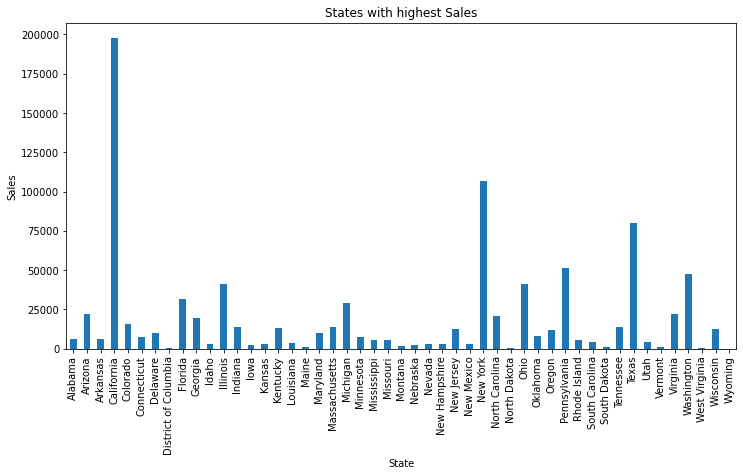

In [52]:
store_df.groupby(['State'])['Sales'].sum().plot(kind='bar')
plt.title('States with highest Sales')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(12,6)
plt.show

#### California has highest Sales follow up by NewYork and Texas

In [53]:
highprofit = store_df.groupby(['City','Category']).mean().sort_values('Profit', ascending = False)[['Sales', 'Profit']]
highprofit

,,Sales,Profit
City,Category,,
Las Vegas,Technology,92.864853,70.1955
Orland Park,Technology,339.960000,67.9920
Rome,Technology,269.980000,67.4950
Gaithersburg,Technology,231.980000,67.2742
Mentor,Technology,239.976000,65.9934
...,...,...,...
San Angelo,Office Supplies,11.648000,-30.8672
Allen,Furniture,244.006000,-31.3722
Commerce City,Office Supplies,146.352000,-32.9292


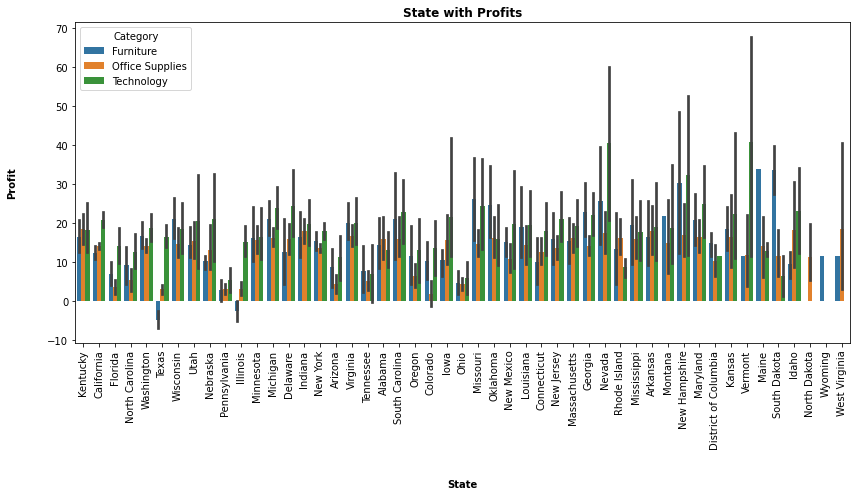

In [54]:
txt = {'weight':'bold'}
sns.barplot(x=store_df['State'], y=store_df['Profit'], hue=store_df['Category'])
plt.title("State with Profits", fontdict = txt)
plt.xticks(rotation = 90)
plt.xlabel("State", fontdict = txt, labelpad=30)
plt.ylabel("Profit", fontdict=txt, labelpad=30)

plt.gcf().set_size_inches(12,7)
plt.tight_layout()

##### This graph elaborates:
<ul>
    <li>Vermont, Nevada & New Hamsphire has the highest Profit(30-60%)in Technology Category moderate in Office Supplies and Furniture</li>
    <li>Texas and Chicago both Cities are in loss</li>

In [55]:
top4_subcategories = ['Binders', 'Paper', 'Furnishings', 'Phones']
region_subcategories_df = store_df.groupby(['Region', 'Sub-Category']).size().unstack()
region_subcategories_df = region_subcategories_df[top4_subcategories]
region_subcategories_df

Sub-Category,Binders,Paper,Furnishings,Phones
Region,,,,
Central,366,321,205,200
East,440,378,283,272
South,246,221,165,140
West,471,450,304,277


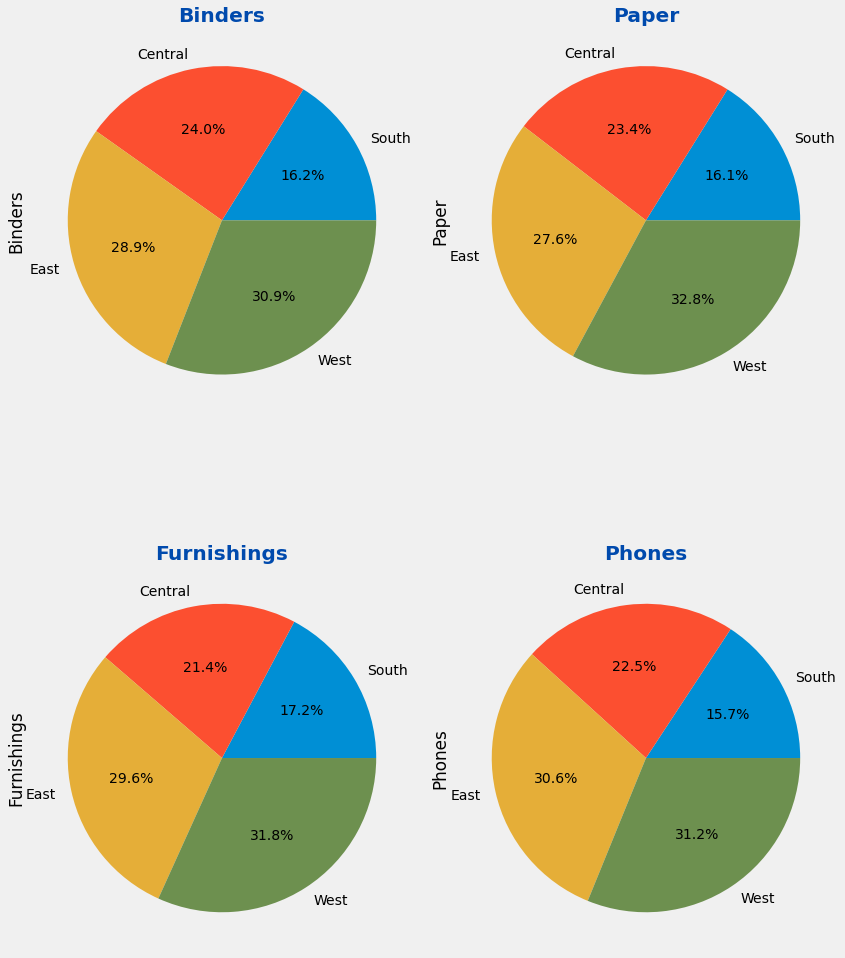

In [56]:
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
col_number = 2
row_number = 2
tex = {'Weight' : 'bold'}
fig, axes = plt.subplots(row_number, col_number)

for i, (label,col) in enumerate(region_subcategories_df.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending = True)[:15]
    col.plot(kind='pie', ax=ax, autopct = '%1.1f%%')
    ax.set_title(label, color = '#004aad', fontdict = txt)

plt.gcf().set_size_inches(12,16)
plt.tight_layout()

In [57]:
top4_subcategories = ['Binders','Paper','Furnishings','Phones']
region_subCategories_df = store_df.groupby(['State','Sub-Category']).size().unstack()
region_subCategories_df = region_subCategories_df[top4_subcategories]
region_subCategories_df.head()

Sub-Category,Binders,Paper,Furnishings,Phones
State,,,,
Alabama,10.0,8.0,3.0,6.0
Arizona,35.0,31.0,21.0,23.0
Arkansas,10.0,12.0,5.0,4.0
California,276.0,289.0,191.0,172.0
Colorado,28.0,19.0,24.0,16.0


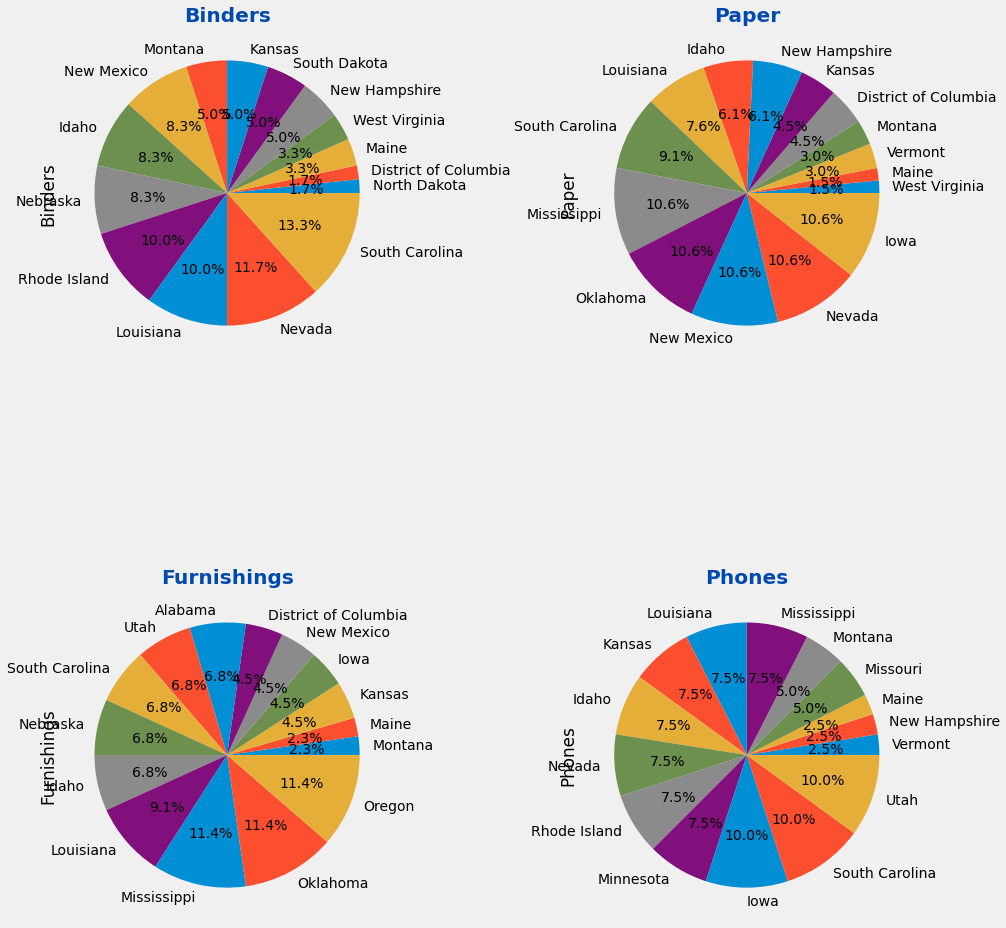

In [58]:
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
col_number = 2
row_number = 2
txt = {'weight' : 'bold'}
fig, axes = plt.subplots(row_number,col_number)

for i, (label,col) in enumerate(region_subCategories_df.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='pie', ax=ax, autopct = '%1.1f%%' )
    ax.set_title(label, color = '#004aad', fontdict = txt)
    
plt.gcf().set_size_inches(14,16)
plt.tight_layout()

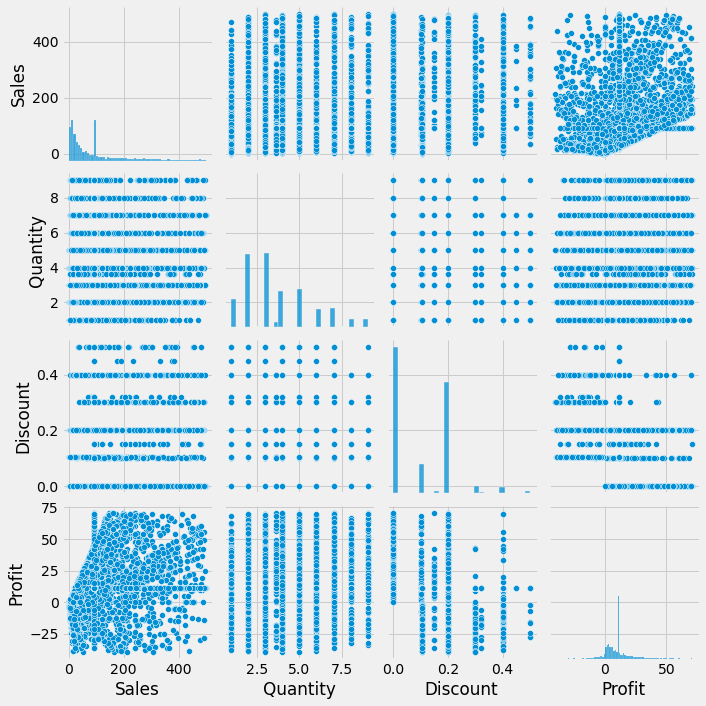

In [59]:
sns.pairplot(store_df)

In [60]:
corr = store_df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.137167,0.116204,0.302718
Quantity,0.137167,1.000000,-0.014588,0.156921
Discount,0.116204,-0.014588,1.000000,-0.219412
Profit,0.302718,0.156921,-0.219412,1.000000


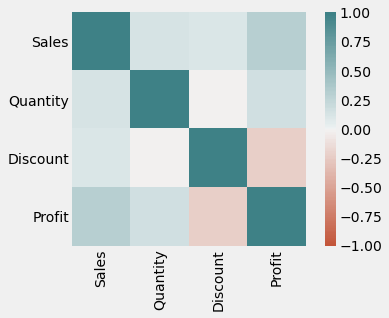

In [61]:
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
                cmap = sns.diverging_palette(20, 200, n=200), 
                square=True)

Heatamp Elaborates:
<ul>
    <li>Sales and Profit are positively related (0.30)</li>
    <li>Discount and Profit are negatively related (-0.21)</li>

### Now as a bussiness analyst we will try to find the weak areas where we can work and make more profit

In [62]:
store_df.pivot_table(values = 'Profit', index = 'Segment', columns = 'Discount', aggfunc = 'median')

Discount,0.00000,0.10000,0.10349,0.15000,0.20000,0.30000,0.32000,0.40000,0.45000,0.50000
Segment,,,,,,,,,,
Consumer,11.604086,11.604086,-4.7520,6.549000,7.1974,-3.0852,-6.019600,11.604086,11.604086,11.604086
Corporate,11.604086,11.604086,-3.9624,11.604086,7.2576,-2.6982,11.604086,11.604086,11.604086,11.604086
Home Office,11.604086,13.437200,-6.3330,15.697800,7.9378,-2.3480,11.604086,11.604086,11.604086,11.604086


In [63]:
store_df.pivot_table(values = 'Sales', index = 'Segment', columns = 'Discount', aggfunc = 'median')

Discount,0.00000,0.10000,0.10349,0.15000,0.20000,0.30000,0.32000,0.40000,0.45000,0.50000
Segment,,,,,,,,,,
Consumer,51.900,136.944000,11.6730,239.666,51.540,127.379,156.372800,109.773000,182.787000,145.980000
Corporate,58.580,92.864853,12.0600,282.166,52.184,113.372,149.098826,92.864853,92.864853,92.864853
Home Office,49.645,145.764000,12.2475,119.833,52.680,208.474,196.698826,92.864853,163.362426,92.864853


#### conclusion:

<ul>
    <li> For discount more than 30%, the superstore was going on loss</li>
    <li>For Discount between (0-20%), sales was average but It was gaining the profit</li>

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

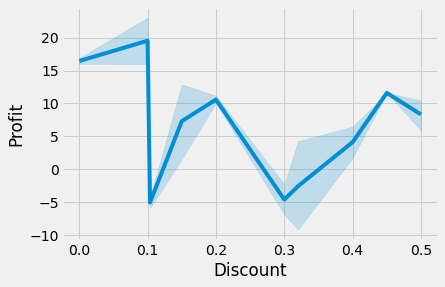

In [64]:
sns.lineplot(store_df['Discount'], store_df['Profit'])

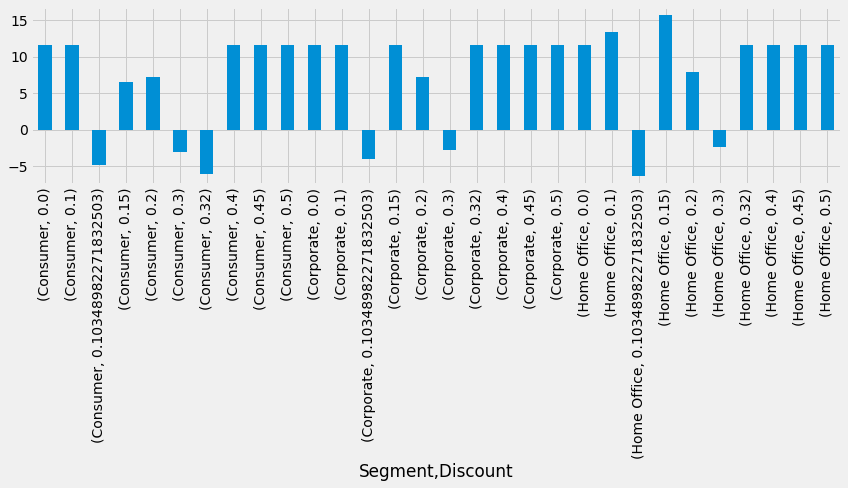

In [65]:
dis = store_df.groupby(['Segment', 'Discount']).Profit.median()
dis.plot(kind = 'bar', stacked = True)
plt.gcf().set_size_inches(12,7)
plt.tight_layout()

### Conclusion
<ul>
    <li>DIscount greater than  30% to the Segment, would result in loss whereas Discount less  than 30% is making profit</li>
    <li>We should limit the sales of furniture and increase that of office supplies and technology as furtinute is generating very less profit as compared to its sales.</li>
    <li>In the sub-categories we are facing huge loss on the sale of tables so its sale should be minimized.</li>
    <li>Sell of Labels and Papers in Sub_category should be increased as it has a huge profit.</li>
    <li>The sales and profit in Southern and Central region are less so we should give more incentives like discount in these states in order to increase sales, hence profit will increase.</li>
    <li>City with highest sales is California. New york and Texas are 2nd and 3rd in sales respectively. Conectrating more on this states will increase Profit.</li>
    <li>We have highest purchases in consumer segment but we should also concentrate on corporate and home office segments to increase our sales and profit. 6.Few states like North Dakota, Wyoming and West Virginia have less or no sales at all so we also need to focus on these state.</li>

#### End of project